
Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn




## 1. Understand and experiment MLP on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[ 0.02021392 -1.23205946] [0. 1.]
[0.00634547 0.58434248] [1. 0.]
[0.46142584 0.81388922] [1. 0.]
[-0.16081455 -1.10214085] [0. 1.]
[1.73713555 0.00580974] [0. 1.]
[ 0.50772086 -1.02667969] [0. 1.]
[0.18308654 0.92409816] [1. 0.]
[ 0.84428945 -0.80961612] [1. 0.]
[-0.17891095 -0.30463193] [0. 1.]
[ 1.3202559  -1.54429917] [0. 1.]
[-0.2055408  -1.15209088] [0. 1.]
[-1.83971935 -0.54219157] [1. 0.]
[-0.25900409  1.49419652] [1. 0.]
[-0.26338189 -0.12683968] [0. 1.]
[ 0.7818648  -1.28991402] [0. 1.]
[-0.21897283  0.3095923 ] [1. 0.]
[ 0.8151901  -1.22241249] [0. 1.]
[ 0.39143533 -1.51845129] [0. 1.]
[ 0.04342323 -1.39036587] [0. 1.]
[ 0.69920066 -0.43258722] [1. 0.]
[-0.37943809 -0.31983643] [0. 1.]
[-0.12868707 -0.33753547] [0. 1.]
[ 1.1079345  -0.87667644] [0. 1.]
[-1.15954023  0.82654021] [1. 0.]
[-0.95329307  1.06571308] [1. 0.]
[ 0.09432011 -1.10332594] [0. 1.]
[ 0.67944422 -0.1

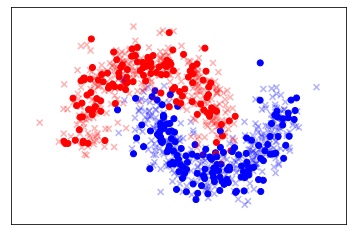

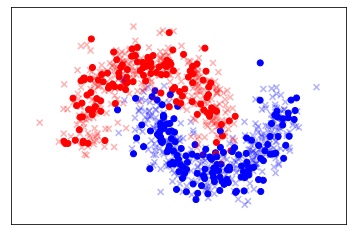

In [1]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**




MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4,
              hidden_layer_sizes=5, learning_rate_init=0.01, max_iter=100,
              momentum=0.8, random_state=11, tol=1e-05, validation_fraction=0.2,
              verbose=True)
Iteration 1, loss = 0.80532267
Iteration 2, loss = 0.56133698
Iteration 3, loss = 0.54164214
MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4,
              hidden_layer_sizes=5, learning_rate_init=0.01, max_iter=100,
              momentum=0.8, random_state=11, tol=1e-05, validation_fraction=0.2,
              verbose=True)
Iteration 1, loss = 0.80532267
Iteration 2, loss = 0.56133698
Iteration 3, loss = 0.54164214
Iteration 4, loss = 0.53138352
Iteration 5, loss = 0.52455472
Iteration 6, loss = 0.52060039
Iteration 7, loss = 0.51288593
Iteration 4, loss = 0.53138352
Iteration 5, loss = 0.52455472
Iteration 6, loss = 0.52060039
Iteration 7, loss = 0.51288593
Iteration 8, loss = 0.51213208
Iteration 9, loss = 0.50013481
Iteration 10, lo

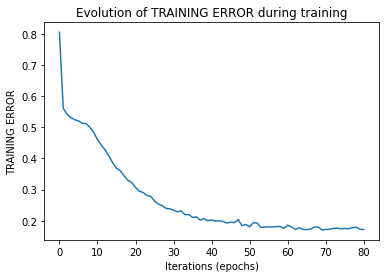

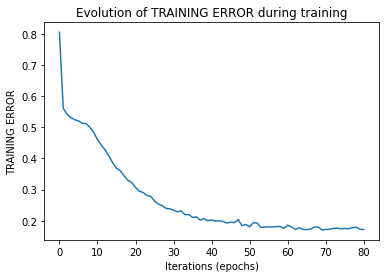

Acuracy (on test set) =  0.9682539682539683
Acuracy (on test set) =  0.9682539682539683


In [2]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)
mlp = MLPClassifier(hidden_layer_sizes=(5 ), activation='tanh', solver='adam', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=100, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)

# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Acuracy (on test set) = ", score)
              

## Below, we visualize the learnt boundary between classes in (2D) input space ##

**THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

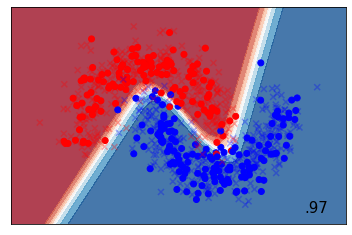

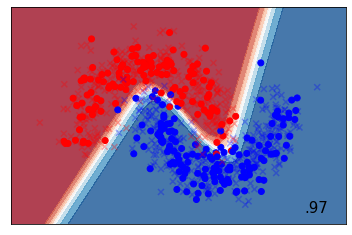

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()



- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find an optimized set of learning hyper-parameters (see code below).**



In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [ (40,)], 
   'learning_rate_init':[0.01,0.1],
   'alpha': [ 0.0001,0.00001]}
 ]



# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=False, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 

# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'alpha': 0.0001, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.01}

Grid scores on development set:

0.956 (+/-0.031) for {'alpha': 0.0001, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.01}
0.944 (+/-0.018) for {'alpha': 0.0001, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.1}
0.956 (+/-0.031) for {'alpha': 1e-05, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.01}
0.941 (+/-0.046) for {'alpha': 1e-05, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       323
           1       0.96      0.98      0.97       307

   micro avg       0.97      0.97      0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630
 

## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET



Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE
Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

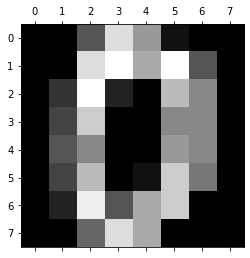

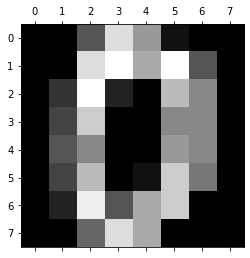

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4,
              hidden_layer_sizes=(10,), momentum=0.8, random_state=11,
              tol=1e-05, verbose=True)MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4,
              hidden_layer_sizes=(10,), momentum=0.8, random_state=11,
              tol=1e-05, verbose=True)
Iteration 1, loss = 1.90350588

Iteration 1, loss = 1.90350588
Iteration 2, loss = 1.41961659
Iteration 3, loss = 1.17374642
Iteration 2, loss = 1.41961659
Iteration 3, loss = 1.17374642
Iteration 4, loss = 0.99453367
Iteration 4, loss = 0.99453367
Iteration 5, loss = 0.83542297
Iteration 6, loss = 0.69678655
Iteration 5, loss = 0.83542297
Iteration 6, loss = 0.69678655
Iteration 7, loss = 0.59681717
Iteration 8, loss = 0.51580514
Iteration 7, loss = 0.59681717
Iteration 8, loss = 0.51580514
Iteration 9, loss = 0.43908931
Iteration 10, loss = 0.39572427
Iteration 9, loss = 0.43908931
Iteration 10, loss = 0.39572427
Iteration 11, loss = 0.35709540
Iterat

Iteration 124, loss = 0.00599711
Iteration 125, loss = 0.00596541
Iteration 124, loss = 0.00599711
Iteration 125, loss = 0.00596541
Iteration 126, loss = 0.00571711
Iteration 127, loss = 0.00549906
Iteration 126, loss = 0.00571711
Iteration 127, loss = 0.00549906
Iteration 128, loss = 0.00537857
Iteration 129, loss = 0.00534792
Iteration 128, loss = 0.00537857
Iteration 129, loss = 0.00534792
Iteration 130, loss = 0.00766189
Iteration 130, loss = 0.00766189
Iteration 131, loss = 0.08984349
Iteration 132, loss = 0.03087027
Iteration 131, loss = 0.08984349
Iteration 132, loss = 0.03087027
Iteration 133, loss = 0.01183843
Iteration 134, loss = 0.00663543
Iteration 133, loss = 0.01183843
Iteration 134, loss = 0.00663543
Iteration 135, loss = 0.00593574
Iteration 136, loss = 0.00568524
Iteration 135, loss = 0.00593574
Iteration 136, loss = 0.00568524
Iteration 137, loss = 0.00546353
Iteration 138, loss = 0.00528369
Iteration 137, loss = 0.00546353
Iteration 138, loss = 0.00528369
Iteration 

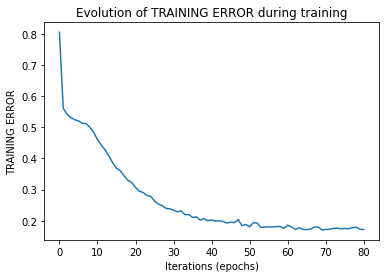

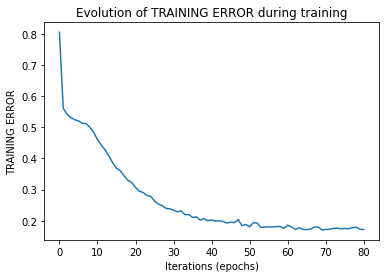

Acuracy (on test set) =  0.9399332591768632
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        81
           1       0.87      0.88      0.88        93
           2       0.99      0.96      0.97        92
           3       0.92      0.93      0.93        87
           4       0.93      0.98      0.95        90
           5       0.96      0.95      0.95        99
           6       1.00      1.00      1.00        97
           7       0.92      0.97      0.95        89
           8       0.91      0.85      0.88        85
           9       0.92      0.93      0.92        86

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899

CONFUSION MATRIX below
Acuracy (on test set) =  0.9399332591768632
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        81
           1       0.

array([[77,  1,  0,  0,  0,  2,  0,  0,  0,  1],
       [ 1, 82,  0,  2,  4,  0,  0,  0,  1,  3],
       [ 1,  3, 88,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 81,  0,  1,  0,  0,  4,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  2,  0, 94,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 97,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  1,  0, 86,  0,  0],
       [ 0,  6,  1,  2,  1,  0,  0,  2, 72,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  2,  2, 80]])

array([[77,  1,  0,  0,  0,  2,  0,  0,  0,  1],
       [ 1, 82,  0,  2,  4,  0,  0,  0,  1,  3],
       [ 1,  3, 88,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 81,  0,  1,  0,  0,  4,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  2,  0, 94,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 97,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  1,  0, 86,  0,  0],
       [ 0,  6,  1,  2,  1,  0,  0,  2, 72,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  2,  2, 80]])

In [5]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(10, ), activation='tanh', solver='adam', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=200, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test,y_digits_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)   


 1)find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**



Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.

Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE
Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

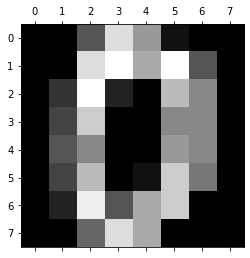

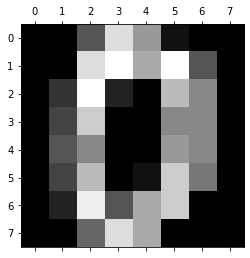

GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='tanh', alpha=1e-05,
                                     batch_size=4, hidden_layer_sizes=(10,),
                                     momentum=True, random_state=11, tol=1e-05,
                                     verbose=True),
             param_grid=[{'alpha': [0.0001, 1e-05],
                          'hidden_layer_sizes': [(40,)],
                          'learning_rate_init': [0.01, 0.001]}],
             scoring='accuracy')
Iteration 1, loss = 1.39473981
GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='tanh', alpha=1e-05,
                                     batch_size=4, hidden_layer_sizes=(10,),
                                     momentum=True, random_state=11, tol=1e-05,
                                     verbose=True),
             param_grid=[{'alpha': [0.0001, 1e-05],
                          'hidden_layer_sizes': [(40,)],
                          'learning_rate_init': [0.01, 0.00

Iteration 4, loss = 0.48828251
Iteration 5, loss = 0.36538510
Iteration 6, loss = 0.29021379
Iteration 6, loss = 0.29021379
Iteration 7, loss = 0.23264042
Iteration 7, loss = 0.23264042
Iteration 8, loss = 0.17863073
Iteration 8, loss = 0.17863073
Iteration 9, loss = 0.15225918
Iteration 9, loss = 0.15225918
Iteration 10, loss = 0.13127240
Iteration 10, loss = 0.13127240
Iteration 11, loss = 0.11133580
Iteration 12, loss = 0.09084019
Iteration 11, loss = 0.11133580
Iteration 12, loss = 0.09084019
Iteration 13, loss = 0.07832513
Iteration 14, loss = 0.06840645
Iteration 13, loss = 0.07832513
Iteration 14, loss = 0.06840645
Iteration 15, loss = 0.06117609
Iteration 16, loss = 0.05336395
Iteration 15, loss = 0.06117609
Iteration 16, loss = 0.05336395
Iteration 17, loss = 0.04742505
Iteration 18, loss = 0.04401602
Iteration 17, loss = 0.04742505
Iteration 18, loss = 0.04401602
Iteration 19, loss = 0.03925108
Iteration 20, loss = 0.03472683
Iteration 19, loss = 0.03925108
Iteration 20, loss

Iteration 35, loss = 0.01014904
Iteration 36, loss = 0.00959204
Iteration 35, loss = 0.01014904
Iteration 36, loss = 0.00959204
Iteration 37, loss = 0.00880381
Iteration 38, loss = 0.00826007
Iteration 37, loss = 0.00880381
Iteration 38, loss = 0.00826007
Iteration 39, loss = 0.00792662
Iteration 40, loss = 0.00724866
Iteration 39, loss = 0.00792662
Iteration 40, loss = 0.00724866
Iteration 41, loss = 0.00686922
Iteration 42, loss = 0.00650000
Iteration 41, loss = 0.00686922
Iteration 42, loss = 0.00650000
Iteration 43, loss = 0.00610742
Iteration 43, loss = 0.00610742
Iteration 44, loss = 0.00574631
Iteration 44, loss = 0.00574631
Iteration 45, loss = 0.00559297
Iteration 45, loss = 0.00559297
Iteration 46, loss = 0.00546233
Iteration 46, loss = 0.00546233
Iteration 47, loss = 0.00522159
Iteration 48, loss = 0.00450611
Iteration 47, loss = 0.00522159
Iteration 48, loss = 0.00450611
Iteration 49, loss = 0.00423566
Iteration 50, loss = 0.00410555
Iteration 49, loss = 0.00423566
Iteratio

Iteration 72, loss = 0.00227797
Iteration 72, loss = 0.00227797
Iteration 73, loss = 0.00225869
Iteration 74, loss = 0.00225571
Iteration 73, loss = 0.00225869
Iteration 74, loss = 0.00225571
Iteration 75, loss = 0.00221140
Iteration 76, loss = 0.00237995
Iteration 75, loss = 0.00221140
Iteration 76, loss = 0.00237995
Iteration 77, loss = 0.00383661
Iteration 78, loss = 0.09339708
Iteration 77, loss = 0.00383661
Iteration 78, loss = 0.09339708
Iteration 79, loss = 0.04878485
Iteration 80, loss = 0.01435890
Iteration 79, loss = 0.04878485
Iteration 80, loss = 0.01435890
Iteration 81, loss = 0.00703599
Iteration 82, loss = 0.00545563
Iteration 81, loss = 0.00703599
Iteration 82, loss = 0.00545563
Iteration 83, loss = 0.00487915
Iteration 84, loss = 0.00447652
Iteration 83, loss = 0.00487915
Iteration 84, loss = 0.00447652
Iteration 85, loss = 0.00422024
Iteration 86, loss = 0.00403177
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 85, 

Iteration 55, loss = 0.28152362
Iteration 56, loss = 0.33604353
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 55, loss = 0.28152362
Iteration 56, loss = 0.33604353
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.14339903
Iteration 2, loss = 1.12633129
Iteration 1, loss = 2.14339903
Iteration 2, loss = 1.12633129
Iteration 3, loss = 0.69473182
Iteration 4, loss = 0.48122481
Iteration 3, loss = 0.69473182
Iteration 4, loss = 0.48122481
Iteration 5, loss = 0.36696938
Iteration 5, loss = 0.36696938
Iteration 6, loss = 0.29143328
Iteration 7, loss = 0.23889341
Iteration 6, loss = 0.29143328
Iteration 7, loss = 0.23889341
Iteration 8, loss = 0.18164552
Iteration 9, loss = 0.15482603
Iteration 8, loss = 0.18164552
Iteration 9, loss = 0.15482603
Iteration 10, loss = 0.13105999
Iteration 11, loss = 0.10989649
Iteration 10, loss = 0.13105999
Iteration 11, loss = 0.10989649
Iterat

Iteration 23, loss = 0.02533178
Iteration 24, loss = 0.02305027
Iteration 23, loss = 0.02533178
Iteration 24, loss = 0.02305027
Iteration 25, loss = 0.02174766
Iteration 25, loss = 0.02174766
Iteration 26, loss = 0.01933289
Iteration 26, loss = 0.01933289
Iteration 27, loss = 0.01766356
Iteration 27, loss = 0.01766356
Iteration 28, loss = 0.01604239
Iteration 28, loss = 0.01604239
Iteration 29, loss = 0.01467391
Iteration 30, loss = 0.01333408
Iteration 29, loss = 0.01467391
Iteration 30, loss = 0.01333408
Iteration 31, loss = 0.01223323
Iteration 32, loss = 0.01103398
Iteration 31, loss = 0.01223323
Iteration 32, loss = 0.01103398
Iteration 33, loss = 0.00980619
Iteration 34, loss = 0.00899919
Iteration 33, loss = 0.00980619
Iteration 34, loss = 0.00899919
Iteration 35, loss = 0.00834513
Iteration 36, loss = 0.00767055
Iteration 35, loss = 0.00834513
Iteration 36, loss = 0.00767055
Iteration 37, loss = 0.00743954
Iteration 38, loss = 0.00656032
Iteration 37, loss = 0.00743954
Iteratio

Iteration 50, loss = 0.00288909
Iteration 51, loss = 0.00263884
Iteration 52, loss = 0.00243204
Iteration 53, loss = 0.00234268
Iteration 52, loss = 0.00243204
Iteration 53, loss = 0.00234268
Iteration 54, loss = 0.00211331
Iteration 55, loss = 0.00201115
Iteration 54, loss = 0.00211331
Iteration 55, loss = 0.00201115
Iteration 56, loss = 0.00186150
Iteration 57, loss = 0.00177585
Iteration 56, loss = 0.00186150
Iteration 57, loss = 0.00177585
Iteration 58, loss = 0.00163867
Iteration 59, loss = 0.00154532
Iteration 58, loss = 0.00163867
Iteration 59, loss = 0.00154532
Iteration 60, loss = 0.00143618
Iteration 61, loss = 0.00135849
Iteration 60, loss = 0.00143618
Iteration 61, loss = 0.00135849
Iteration 62, loss = 0.00128410
Iteration 63, loss = 0.00121088
Iteration 62, loss = 0.00128410
Iteration 63, loss = 0.00121088
Iteration 64, loss = 0.00112125
Iteration 65, loss = 0.00106363
Iteration 64, loss = 0.00112125
Iteration 65, loss = 0.00106363
Iteration 66, loss = 0.00099821
Iteratio

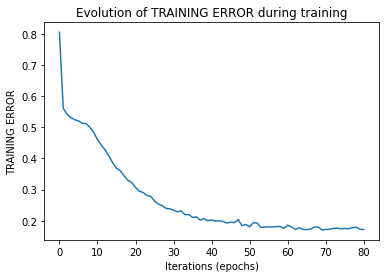

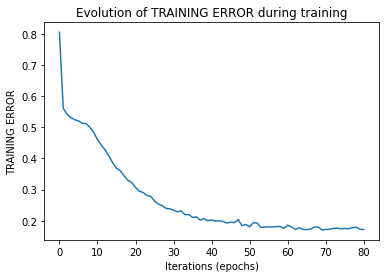

Acuracy (on test set) =  0.9688542825361512
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.93      0.99      0.96        88
           2       0.98      1.00      0.99        85
           3       0.96      0.94      0.95        78
           4       0.99      0.98      0.99       101
           5       0.98      0.95      0.96       101
           6       1.00      0.98      0.99        83
           7       1.00      0.99      0.99        86
           8       0.92      0.91      0.91        86
           9       0.94      0.96      0.95        99

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

CONFUSION MATRIX below
CONFUSION MATRIX below but beautiful
Acuracy (on test set) =  0.9688542825361512
              precision    recall  f1-score   support

           0       1.00      1.00     

ValueError: Expected 2D array, got 1D array instead:
array=[8 6 3 1 9 5 3 1 7 9 1 1 0 9 5 7 2 1 6 7 6 0 4 9 6 2 5 1 4 2 0 5 8 7 2 1 5
 6 8 2 4 3 2 1 0 8 5 6 5 1 5 5 2 5 1 2 9 7 4 6 6 9 3 5 1 1 4 3 8 8 4 8 9 4
 5 5 1 0 0 2 8 6 5 3 6 1 6 4 1 7 9 5 3 8 5 2 2 6 4 0 0 5 4 8 3 0 5 1 4 5 9
 8 7 1 7 3 2 9 4 2 3 3 4 3 9 8 1 7 6 8 4 8 8 8 5 0 6 8 7 7 2 5 0 6 2 0 2 7
 1 4 6 2 0 1 9 7 4 6 7 5 2 8 8 6 3 2 6 6 9 5 7 1 4 0 0 1 2 9 7 7 6 2 9 0 1
 4 1 6 0 8 2 6 9 0 0 2 4 9 9 3 8 0 5 5 7 1 9 7 9 8 2 4 5 9 9 3 5 0 2 3 3 4
 4 5 0 5 3 4 7 0 8 7 6 9 8 6 4 8 0 3 3 5 3 2 5 8 4 4 2 1 1 4 0 0 8 6 1 8 3
 5 6 4 5 8 3 6 2 1 4 6 1 9 0 3 3 9 4 4 1 1 8 5 1 4 2 3 4 8 5 3 9 4 0 2 8 8
 1 9 5 6 9 9 4 2 3 5 7 9 0 6 4 9 5 0 0 3 6 8 1 6 5 6 6 6 3 5 4 9 8 5 0 2 1
 9 0 9 9 8 1 2 2 5 0 2 6 9 9 4 2 5 0 1 8 3 3 5 1 0 4 7 3 4 3 6 4 0 9 5 3 4
 6 7 8 7 4 4 3 5 9 4 0 8 5 6 1 9 4 3 8 6 2 9 6 7 7 9 6 4 6 8 8 6 7 4 9 0 3
 4 2 9 0 9 9 6 5 7 3 9 2 4 4 1 8 2 5 1 6 4 9 8 1 3 9 2 3 8 6 6 4 9 0 7 7 0
 0 5 7 8 6 5 0 3 7 1 9 7 3 9 6 1 5 1 1 0 3 2 9 1 9 4 6 8 7 9 8 4 5 3 2 1 1
 5 5 3 0 9 1 4 0 7 0 4 3 0 2 9 5 0 9 9 0 0 9 5 0 7 7 7 4 7 9 4 9 9 1 8 4 9
 0 7 4 0 5 4 7 5 5 1 5 9 4 5 3 6 1 7 1 7 4 5 1 1 7 2 1 2 2 1 9 8 1 8 8 7 8
 1 7 2 5 8 8 4 8 0 7 2 2 2 4 9 5 1 6 3 3 9 5 9 7 9 1 0 2 6 7 1 6 8 6 4 7 3
 0 2 4 5 4 8 4 6 1 4 1 7 4 3 4 0 2 4 0 7 7 5 8 9 6 0 2 3 4 9 2 0 8 3 9 0 7
 8 3 2 3 0 5 8 5 7 4 5 2 9 6 3 2 3 1 8 7 1 5 9 6 6 3 7 1 6 6 9 6 0 5 9 0 1
 7 1 8 6 9 9 2 9 4 7 7 4 8 2 2 8 6 7 0 1 0 5 4 8 9 2 0 0 0 4 5 7 2 7 1 2 6
 5 7 8 8 0 7 2 9 4 2 3 0 7 8 3 9 4 3 3 3 5 0 2 9 7 1 6 9 4 4 9 4 4 9 7 7 5
 9 0 5 6 6 4 5 5 3 2 8 3 5 0 8 7 8 4 1 2 8 6 6 0 7 9 4 1 2 2 5 0 9 8 7 4 0
 2 9 7 0 8 4 5 8 1 4 5 7 8 6 2 7 3 1 6 2 7 2 5 3 7 5 4 7 3 5 2 6 0 1 3 2 6
 5 3 0 7 8 0 3 6 4 5 1 0 9 7 3 5 0 3 9 4 5 8 7 7 5 8 6 0 5 3 0 5 9 6 8 2 1
 4 8 1 9 9 2 4 1 2 4 6 5 5 7 5 6 5 9 1 0 2 6 8 8 9 2 0 5 4 4 1 7 0 2 3 7 3
 5 9 2 8 0 1 3 1 4 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: Expected 2D array, got 1D array instead:
array=[8 6 3 1 9 5 3 1 7 9 1 1 0 9 5 7 2 1 6 7 6 0 4 9 6 2 5 1 4 2 0 5 8 7 2 1 5
 6 8 2 4 3 2 1 0 8 5 6 5 1 5 5 2 5 1 2 9 7 4 6 6 9 3 5 1 1 4 3 8 8 4 8 9 4
 5 5 1 0 0 2 8 6 5 3 6 1 6 4 1 7 9 5 3 8 5 2 2 6 4 0 0 5 4 8 3 0 5 1 4 5 9
 8 7 1 7 3 2 9 4 2 3 3 4 3 9 8 1 7 6 8 4 8 8 8 5 0 6 8 7 7 2 5 0 6 2 0 2 7
 1 4 6 2 0 1 9 7 4 6 7 5 2 8 8 6 3 2 6 6 9 5 7 1 4 0 0 1 2 9 7 7 6 2 9 0 1
 4 1 6 0 8 2 6 9 0 0 2 4 9 9 3 8 0 5 5 7 1 9 7 9 8 2 4 5 9 9 3 5 0 2 3 3 4
 4 5 0 5 3 4 7 0 8 7 6 9 8 6 4 8 0 3 3 5 3 2 5 8 4 4 2 1 1 4 0 0 8 6 1 8 3
 5 6 4 5 8 3 6 2 1 4 6 1 9 0 3 3 9 4 4 1 1 8 5 1 4 2 3 4 8 5 3 9 4 0 2 8 8
 1 9 5 6 9 9 4 2 3 5 7 9 0 6 4 9 5 0 0 3 6 8 1 6 5 6 6 6 3 5 4 9 8 5 0 2 1
 9 0 9 9 8 1 2 2 5 0 2 6 9 9 4 2 5 0 1 8 3 3 5 1 0 4 7 3 4 3 6 4 0 9 5 3 4
 6 7 8 7 4 4 3 5 9 4 0 8 5 6 1 9 4 3 8 6 2 9 6 7 7 9 6 4 6 8 8 6 7 4 9 0 3
 4 2 9 0 9 9 6 5 7 3 9 2 4 4 1 8 2 5 1 6 4 9 8 1 3 9 2 3 8 6 6 4 9 0 7 7 0
 0 5 7 8 6 5 0 3 7 1 9 7 3 9 6 1 5 1 1 0 3 2 9 1 9 4 6 8 7 9 8 4 5 3 2 1 1
 5 5 3 0 9 1 4 0 7 0 4 3 0 2 9 5 0 9 9 0 0 9 5 0 7 7 7 4 7 9 4 9 9 1 8 4 9
 0 7 4 0 5 4 7 5 5 1 5 9 4 5 3 6 1 7 1 7 4 5 1 1 7 2 1 2 2 1 9 8 1 8 8 7 8
 1 7 2 5 8 8 4 8 0 7 2 2 2 4 9 5 1 6 3 3 9 5 9 7 9 1 0 2 6 7 1 6 8 6 4 7 3
 0 2 4 5 4 8 4 6 1 4 1 7 4 3 4 0 2 4 0 7 7 5 8 9 6 0 2 3 4 9 2 0 8 3 9 0 7
 8 3 2 3 0 5 8 5 7 4 5 2 9 6 3 2 3 1 8 7 1 5 9 6 6 3 7 1 6 6 9 6 0 5 9 0 1
 7 1 8 6 9 9 2 9 4 7 7 4 8 2 2 8 6 7 0 1 0 5 4 8 9 2 0 0 0 4 5 7 2 7 1 2 6
 5 7 8 8 0 7 2 9 4 2 3 0 7 8 3 9 4 3 3 3 5 0 2 9 7 1 6 9 4 4 9 4 4 9 7 7 5
 9 0 5 6 6 4 5 5 3 2 8 3 5 0 8 7 8 4 1 2 8 6 6 0 7 9 4 1 2 2 5 0 9 8 7 4 0
 2 9 7 0 8 4 5 8 1 4 5 7 8 6 2 7 3 1 6 2 7 2 5 3 7 5 4 7 3 5 2 6 0 1 3 2 6
 5 3 0 7 8 0 3 6 4 5 1 0 9 7 3 5 0 3 9 4 5 8 7 7 5 8 6 0 5 3 0 5 9 6 8 2 1
 4 8 1 9 9 2 4 1 2 4 6 5 5 7 5 6 5 9 1 0 2 6 8 8 9 2 0 5 4 4 1 7 0 2 3 7 3
 5 9 2 8 0 1 3 1 4 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.5)

param_grid = [
  {'hidden_layer_sizes': [ (40,)], 
   'learning_rate_init':[0.01,0.001],
   'alpha': [ 0.0001,0.00001]}
 ]


clf = GridSearchCV(MLPClassifier(hidden_layer_sizes=(10, ), activation='tanh', solver='adam', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=200, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=True, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08),param_grid, cv=3, scoring='accuracy') 
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

#best params: 
print("Best parameters set found on development set:")
print()
print(clf.best_params_)



# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test,y_digits_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)   


# Display prettier and easier CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print("CONFUSION MATRIX below but beautiful")
disp=plot_confusion_matrix(clf,y_true,y_pred,cmap=plt.cm.Blues,normalize=True)

disp.ax_.set_title("Confusion Matrix normalize and blue")



Assignment #3: compute and plot the precision-recall curve (for each class). NB: search into sciKit-learn documentation to find the function for that, and then add a code cell that uses it.

Assignment #4: display the confusion matrix as a prettier and more easily understable plot (cf. example on https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

Assignment #5 (optional): plot the first layer of weights as images (see explanations and example code at http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)